## PHYS123 Group Homework Project

### Wolf Mermelstein, Sara Elanchezhian, Mathew Gummere
### December 2, 2023

# Part G1

Calculating and plotting the recursively defined function
$$x_{n+1} = R x_n (1 - x_n)$$

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Iterator

"""
Generator that continuously yields logistics equation values at x_0 for some growth rate R.

Args:
    R: The growth rate.
    x_0: The initial x value.

Yields:
    The next value of the logistics equation.
"""
def compute_logistics_equation_values(R: float, x_0: float) -> Iterator[float]:
    x_prev = x_0
    while True:
        x_prev = R * x_prev * (1 - x_prev)
        yield x_prev
    

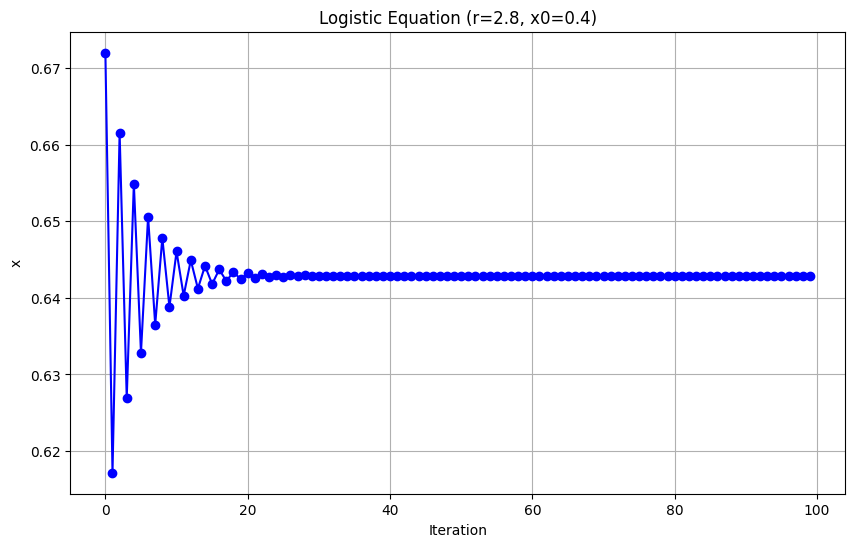

In [16]:
R=2.8
x_0=0.4
N=100

# Compute values
x_values = np.fromiter(compute_logistics_equation_values(R, x_0), float, count=N)
iteration_counts = np.arange(N)

# Construct the plot
plt.figure(figsize=(10, 6))
plt.plot(iteration_counts, x_values, marker='o', linestyle='-', color='b')
plt.title(f'Logistic Equation (r={R}, x0={x_0})')
plt.xlabel('Iteration')
plt.ylabel('x')
plt.grid(True)
plt.show()

# Part G2

Finding values of $R_n$ where the logisics equation switches from

* Period 1 to period 2, $R_1$
* Period 2 to period 4, $R_2$
* Period 4 to period 8, $R_3$
* Period 8 to period 16, $R_4$
* Period 16 to period 32, $R_5$

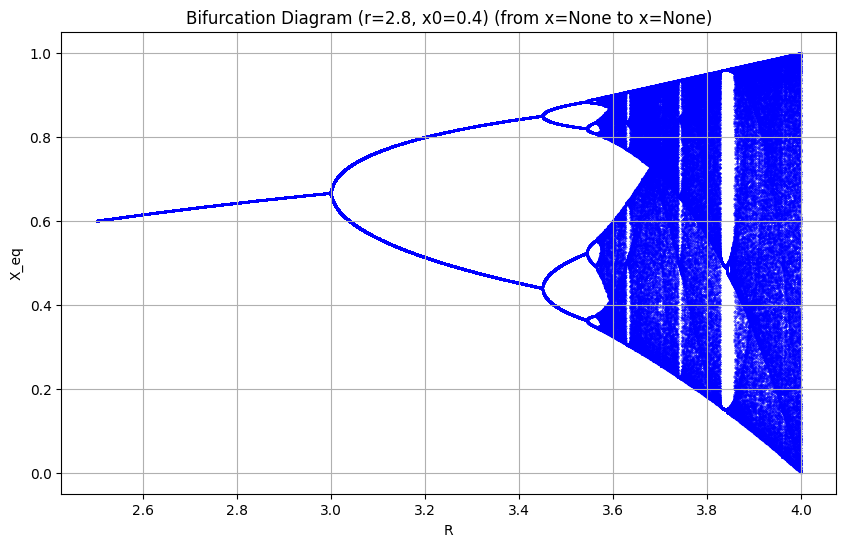

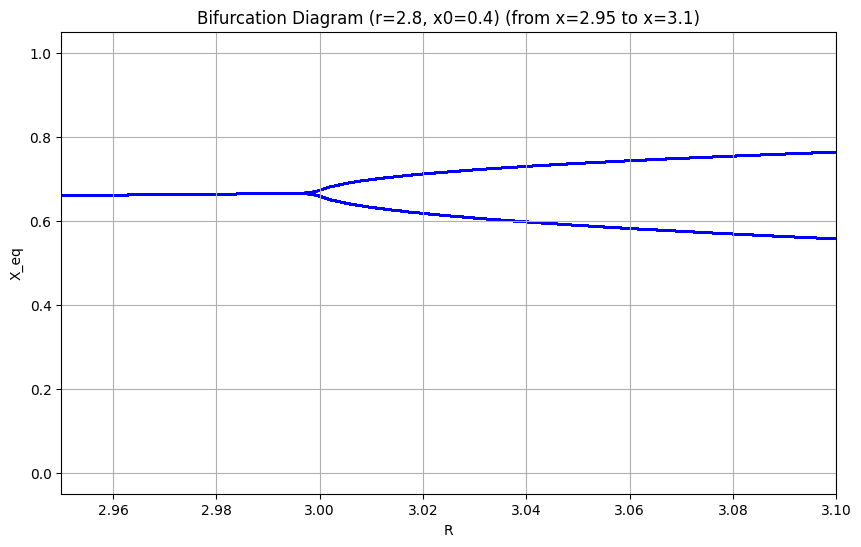

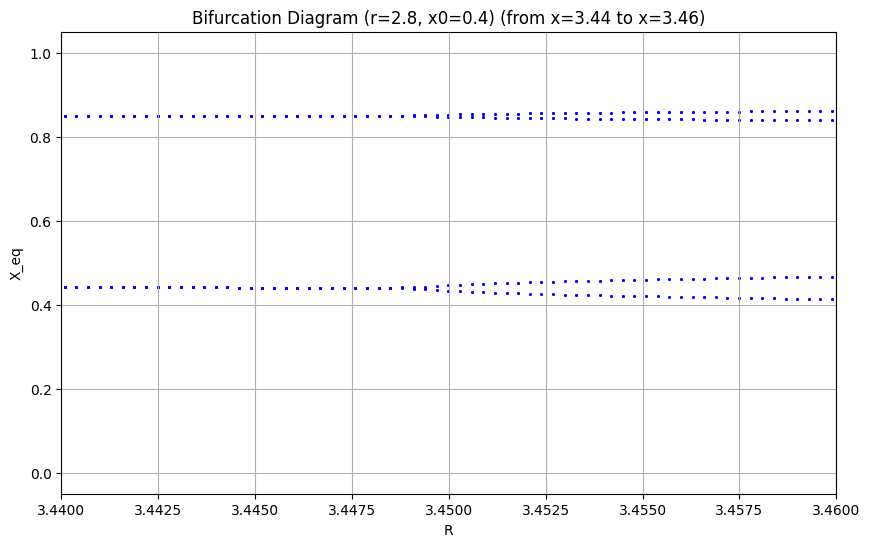

In [42]:
R_value_count = 5000 # Number of R values to have for our x axis
R_value_min = 2.5 # Initial R value
R_value_max = 4 # Max R value

# How many values to compute before we assume we are near equilibrium
iteration_to_start_at = 1000

# Number of x values to sample
x_per_R_value_count = 100

x_coords = np.zeros(R_value_count * x_per_R_value_count)
y_coords = np.zeros(R_value_count * x_per_R_value_count)
next_val = 0

# For each R value in an evenly distributed range starting at <R_value_min> up to <R_value_max>
# with R_value_count values overall.
for R_val in np.linspace(R_value_min, R_value_max, R_value_count):
    # Create a generator to compute x values from
    logistics_value_computer = compute_logistics_equation_values(R_val, x_0)
    
    # Skip past <iteration_to_start_at> number of computed x values
    for i in range(iteration_to_start_at):
        next(logistics_value_computer)
        
    # Generate <x_per_R_value_count> number of x values and add them to the plot at the current
    # R value (recall x axis is R)
    for i in range(x_per_R_value_count):
        x_coords[next_val] = R_val
        y_coords[next_val] = next(logistics_value_computer)
        next_val += 1

def plot_bifurcation_diagram(x_min = None, x_max = None):
    plt.figure(figsize=(10, 6))
    if x_min or x_max:
        plt.xlim(x_min, x_max)
    plt.scatter(x_coords, y_coords, marker='o', linestyle='-', color='b', s=.1)
    plt.title(f'Bifurcation Diagram (r={R}, x0={x_0}) (from x={x_min} to x={x_max})')
    plt.xlabel('R')
    plt.ylabel('X_eq')
    plt.grid(True)
    plt.show()

plot_bifurcation_diagram()
plot_bifurcation_diagram(2.95, 3.1)
plot_bifurcation_diagram(3.44, 3.46)

# Part G5

Consider the logisics equation $x_{n+1} = R x_n (1 - x_n)$ with the growth parameter set to
$R = 3.6$. 

Define a sequence $x_{true}$ to be set of the $x_n$ calculated with $R = 3.6$ and $x_0 = 0.5$

Define a sequence $x_{pred}$ to be set of the $x_n$ calculated with $R = 3.6$ and $x_0 = 0.5 + \epsilon $. 

The idea is that even a small error $\epsilon$ in the initial conditon will lead to predicted values that vary wildly from the "true" values.

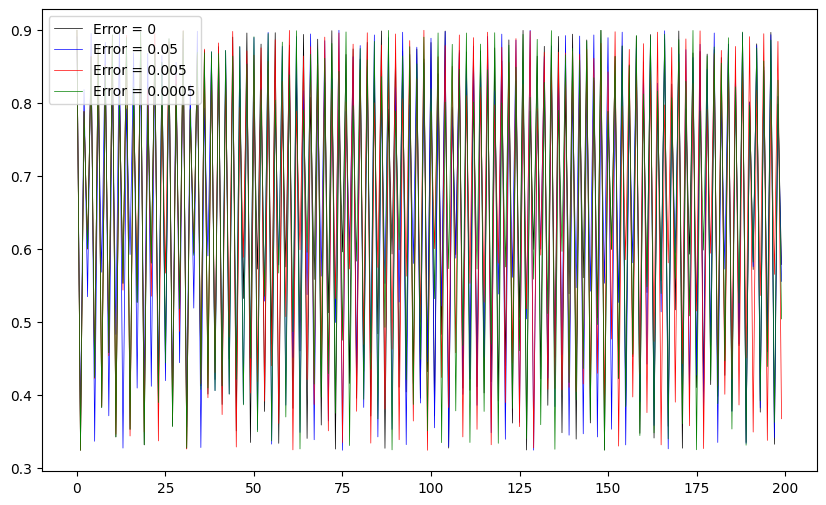

In [57]:
# Create an array of incrementing numbers for the iteration counts
iteration_counts = np.arange(N)

"""Add an error to an x_0 value."""
def with_error(x_0, error):
    return x_0 + error

"""Build an array of x values for a given error value."""
def compute_x_values(x_0, error=0):
    return np.fromiter(compute_logistics_equation_values(R, with_error(x_0, error)), float, count=N)

# Construct the plots one by one
def plot_y_axis(axes, x_values, y_values, color, label, width=.5):
    ax1.plot(x_values, y_values, color=color, label=label, linewidth=width)
    ax3.set_ylabel(label, color=color)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Create y axis for the various errors
errors = (0, 0.05, 0.005, 0.0005)
colors = ('black', 'blue', 'red', 'green')

# Initial value for x axis
iteration_count_start = 0

# Plot the data
for error, color in zip(errors, colors):
    values = compute_x_values(x_0, error)[iteration_count_start:]
    label = f'Error = {error}'
    plot_y_axis(ax1, iteration_counts, values, color=color, label=label)
    
# Add a legand
ax1.legend(loc='upper left')

# Show the plot
plt.show()